In [94]:
#Step1 : Import Packages

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

import statsmodels.tsa.api as smt
import calendar

In [95]:
Test =  pd.read_csv('H:/Machine Learning/7. Kaggle - Competition Data/competitive-data-science-predict-future-sales/test.csv')
Sales_Train = pd.read_csv('H:/Machine Learning/7. Kaggle - Competition Data/competitive-data-science-predict-future-sales/sales_train.csv')
Item_Categories = pd.read_csv('H:/Machine Learning/7. Kaggle - Competition Data/competitive-data-science-predict-future-sales/item_categories.csv')
Shops = pd.read_csv('H:/Machine Learning/7. Kaggle - Competition Data/competitive-data-science-predict-future-sales/shops.csv')
Items = pd.read_csv('H:/Machine Learning/7. Kaggle - Competition Data/competitive-data-science-predict-future-sales/items.csv')

In [96]:
## Train Data

train_mid = pd.merge(Sales_Train,Shops)
train_fin = pd.merge(train_mid,Items)
Sales_Train_Data = pd.merge(train_fin,Item_Categories)

In [97]:
Sales_Train_Data.head(5)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name
0,02.01.2013,0,59,22154,999.0,1.0,"Ярославль ТЦ ""Альтаир""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,02.01.2013,0,25,22154,999.0,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
2,03.01.2013,0,25,22154,999.0,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
3,20.01.2013,0,25,22154,999.0,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
4,23.01.2013,0,25,22154,999.0,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray


In [98]:
#Difference of 1 Column in Test Data where Weekly Sales are not defined which we need to Identify using Linear Model

print(Sales_Train_Data.shape)

(2935849, 10)


In [99]:
print(Sales_Train_Data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935849 entries, 0 to 2935848
Data columns (total 10 columns):
date                  object
date_block_num        int64
shop_id               int64
item_id               int64
item_price            float64
item_cnt_day          float64
shop_name             object
item_name             object
item_category_id      int64
item_category_name    object
dtypes: float64(2), int64(4), object(4)
memory usage: 246.4+ MB
None


In [100]:
print("Number of Missing values in Train data : ",Sales_Train_Data.isnull().sum().sum())

Number of Missing values in Train data :  0


### Time Series Analysis

In [101]:
#Changing Data type of Date Variable and Extracting month and Year from it.

import calendar

#Train Data
Sales_Train_Data['date'] = pd.to_datetime(Sales_Train_Data['date'])
Sales_Train_Data['Month']= Sales_Train_Data.date.dt.month.apply(lambda x: calendar.month_abbr[x])
Sales_Train_Data['Year'] = Sales_Train_Data.date.dt.year

#Modifying existing varaibles
Sales_Train_Data['Month'] = Sales_Train_Data.Month.astype(str)

In [102]:
Sales_Train_Data.head(5)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name,Month,Year
0,2013-02-01,0,59,22154,999.0,1.0,"Ярославль ТЦ ""Альтаир""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,Feb,2013
1,2013-02-01,0,25,22154,999.0,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,Feb,2013
2,2013-03-01,0,25,22154,999.0,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,Mar,2013
3,2013-01-20,0,25,22154,999.0,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,Jan,2013
4,2013-01-23,0,25,22154,999.0,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,Jan,2013


In [103]:
ts = Sales_Train_Data.groupby(by=['date'])
num = pd.DataFrame(ts[['item_cnt_day']].sum())
num1 = num.reset_index()
num1

,date,item_cnt_day
0,2013-01-01,1951.0
1,2013-01-02,3817.0
2,2013-01-03,3846.0
3,2013-01-04,2574.0
4,2013-01-05,4863.0
...,...,...
1029,2015-12-06,2690.0
1030,2015-12-07,2263.0
1031,2015-12-08,1696.0
1032,2015-12-09,3304.0


In [104]:
num1.describe()

,item_cnt_day
count,1034.000000
mean,3528.245648
std,1584.687467
min,1274.000000
25%,2472.250000
50%,3145.000000
75%,4257.000000
max,13343.000000


In [105]:
#Step 3: We need to convert Test Data into Time Series Data indexed by Time

Time_Series_Data = num1

In [106]:
#Step 2: Extract the month and Year and convert them into Separate Columns  and editing Columns as per our requirement
Time_Series_Data['date'] = pd.to_datetime(Time_Series_Data['date'])
Time_Series_Data['Month']= Time_Series_Data.date.dt.month.apply(lambda x: calendar.month_abbr[x])
Time_Series_Data['Year'] = Time_Series_Data.date.dt.year

In [107]:
Time_Series_Data.set_index('date')

,item_cnt_day,Month,Year
date,,,
2013-01-01,1951.0,Jan,2013
2013-01-02,3817.0,Jan,2013
2013-01-03,3846.0,Jan,2013
2013-01-04,2574.0,Jan,2013
2013-01-05,4863.0,Jan,2013
...,...,...,...
2015-12-06,2690.0,Dec,2015
2015-12-07,2263.0,Dec,2015
2015-12-08,1696.0,Dec,2015


In [108]:
Time_Series_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 4 columns):
date            1034 non-null datetime64[ns]
item_cnt_day    1034 non-null float64
Month           1034 non-null object
Year            1034 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 32.4+ KB


In [109]:
Time_Series_Data = Time_Series_Data.rename(columns={'item_cnt_day':'Item_Count'})

In [110]:
Time_Series_Data.head(5)

,date,Item_Count,Month,Year
0,2013-01-01,1951.0,Jan,2013
1,2013-01-02,3817.0,Jan,2013
2,2013-01-03,3846.0,Jan,2013
3,2013-01-04,2574.0,Jan,2013
4,2013-01-05,4863.0,Jan,2013


In [111]:
#Step 3: Extracting Final Test Data from Item List

Item_List = pd.DataFrame(Time_Series_Data['Item_Count'])

In [112]:
Item_List.set_index(Time_Series_Data['date'],inplace=True)

Text(0, 0.5, 'Item Count')

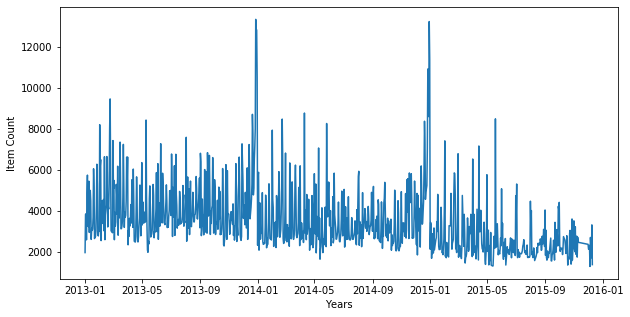

In [113]:
#Step 4: --> #Plotting Final List of Test Data to Check the Data Observation

plt.figure(figsize=(10, 5))
plt.plot(Item_List)
plt.xlabel('Years')
plt.ylabel('Item Count')

#Notes --> (1) Data having Seasonality and Trend as can be observed over the Graph
           (2) Data having Irregular Components(It) along with St ,Tt

In [114]:
#Step 5: ---> Univariate Time Series (Moving Average)

MA =Item_List.rolling(window=4).mean()
MA

,Item_Count
date,
2013-01-01,NaN
2013-01-02,NaN
2013-01-03,NaN
2013-01-04,3047.00
2013-01-05,3775.00
...,...
2015-12-06,2096.00
2015-12-07,2132.25
2015-12-08,1980.75


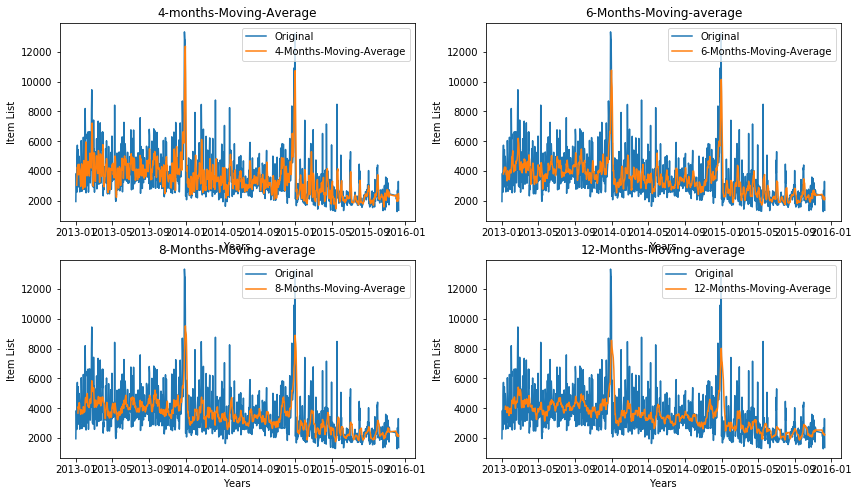

In [115]:
#Step6: --> #Plotting MA into 4-Month,6-Month ,8-Month and 12-Month Moving Averages

fig,axes = plt.subplots(2,2,sharex=False,sharey=False)
fig.set_figwidth(14)
fig.set_figheight(8)

# 4 Months Moving Average
axes[0][0].plot(Item_List.index,Item_List,label = 'Original')
axes[0][0].plot(Item_List.index,Item_List.rolling(window=4).mean(),label = '4-Months-Moving-Average')
axes[0][0].set_xlabel('Years')
axes[0][0].set_ylabel('Item List')
axes[0][0].set_title('4-months-Moving-Average')
axes[0][0].legend(loc='best')

#6 Months Moving Average
axes[0][1].plot(Item_List.index,Item_List,label ='Original')
axes[0][1].plot(Item_List.index,Item_List.rolling(window=6).mean(),label='6-Months-Moving-Average')
axes[0][1].set_xlabel('Years')
axes[0][1].set_ylabel('Item List')
axes[0][1].set_title('6-Months-Moving-average')
axes[0][1].legend(loc='best')

#8 Months Moving Average
axes[1][0].plot(Item_List.index,Item_List,label ='Original')
axes[1][0].plot(Item_List.index,Item_List.rolling(window=8).mean(),label='8-Months-Moving-Average')
axes[1][0].set_xlabel('Years')
axes[1][0].set_ylabel('Item List')
axes[1][0].set_title('8-Months-Moving-average')
axes[1][0].legend(loc='best')

#12 Months Moving Average
axes[1][1].plot(Item_List.index,Item_List,label ='Original')
axes[1][1].plot(Item_List.index,Item_List.rolling(window=12).mean(),label='12-Months-Moving-Average')
axes[1][1].set_xlabel('Years')
axes[1][1].set_ylabel('Item List')
axes[1][1].set_title('12-Months-Moving-average')
axes[1][1].legend(loc='best')

As we could see in the above plots, 12-month moving average could produce litte better wrinkle free curve near desired. This on some level is expected since we are using month-wise data for our analysis and there is expected monthly-seasonal effect in our data.

Let's plot the rolling mean and standard deviation on window of 12 months

### Decompostition

In [116]:
#To identify the Seasonality effect - in Item Sales data

In [117]:
#Monthly Sales Data

monthly_sales_data = pd.pivot_table(Time_Series_Data,values='Item_Count',columns='Year',index='Month')
monthly_sales_data = monthly_sales_data.reindex(index = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
monthly_sales_data

Year,2013,2014,2015
Month,,,
Jan,3772.580645,3271.580645,2697.758621
Feb,4771.678571,3962.642857,3114.961538
Mar,4535.032258,3605.741935,2624.793103
Apr,3739.500000,3449.966667,2807.178571
May,3768.000000,3500.032258,2545.344828
Jun,4247.366667,3338.100000,2275.107143
Jul,4151.161290,3121.225806,2240.241379
Aug,4247.612903,3549.580645,2392.241379
Sep,4437.000000,3393.966667,2354.750000


<Figure size 18000x14400 with 0 Axes>

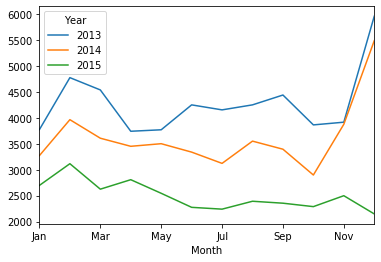

In [118]:
#Visualise the Test Data - Monthly and Yearly to identify the Seasonality and Trend effect

plt.figure(figsize=(250,200))
monthly_sales_data.plot()

In [119]:
#Yearly Sales Data

yearly_sales_data = pd.pivot_table(Time_Series_Data, values = 'Item_Count', columns = "Month", index = "Year")
yearly_sales_data = yearly_sales_data[['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]
yearly_sales_data

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2013,3772.580645,4771.678571,4535.032258,3739.500000,3768.000000,4247.366667,4151.161290,4247.612903,4437.000000,3862.032258,3914.066667,5953.516129
2014,3271.580645,3962.642857,3605.741935,3449.966667,3500.032258,3338.100000,3121.225806,3549.580645,3393.966667,2897.193548,3874.100000,5482.096774
2015,2697.758621,3114.961538,2624.793103,2807.178571,2545.344828,2275.107143,2240.241379,2392.241379,2354.750000,2288.724138,2499.000000,2148.400000


<Figure size 18000x14400 with 0 Axes>

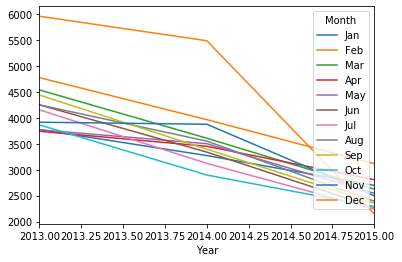

In [120]:
plt.figure(figsize=(250,200))
yearly_sales_data.plot()

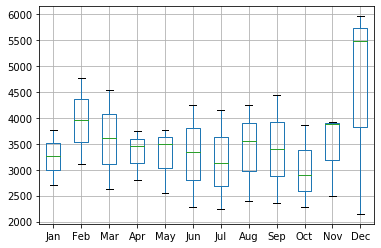

In [121]:
yearly_sales_data.boxplot()

#### Important Inferences

The Items sales have been decresing without  every year some year the sales increased Rapidly

Oct to Dec are the peak months for Passenger Flying and the variance and the mean value in July to September are also much higher than any of the other months.

We can see a seasonal cycle of 12 months where the mean value of each month starts with a increasing trend in the beginning of the year and drops down towards the end of the year. We can see a seasonal effect with a cycle of 12 months.

## Time Series Decomposition

In [122]:
import statsmodels as sm

In [123]:
decomposition = sm.tsa.seasonal.seasonal_decompose(Item_List,model='multiplicative',freq=365,two_sided=False,extrapolate_trend=6)

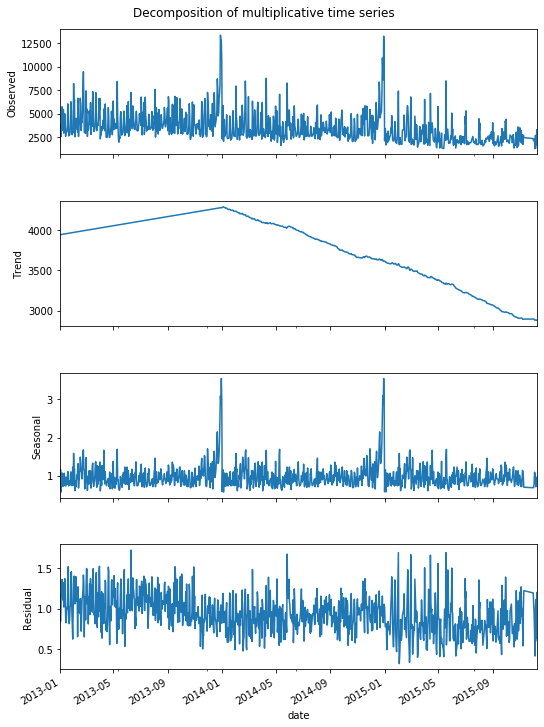

In [124]:
fig = decomposition.plot()
fig.set_figheight(12)
fig.set_figwidth(8)
fig.suptitle('Decomposition of multiplicative time series')
plt.show()

In [125]:
decompostion_Output  = pd.DataFrame(pd.concat([decomposition.observed,decomposition.trend,decomposition.seasonal,decomposition.resid],axis = 1))
decompostion_Output.columns = ['observed','Trend','Seasonal','Irregular']
decompostion_Output

,observed,Trend,Seasonal,Irregular
date,,,,
2013-01-01,1951.0,3945.456556,0.576285,0.858070
2013-01-02,3817.0,3946.387476,1.155240,0.837241
2013-01-03,3846.0,3947.318395,1.152441,0.845451
2013-01-04,2574.0,3948.249315,0.568893,1.145970
2013-01-05,4863.0,3949.180235,1.025291,1.201020
...,...,...,...,...
2015-12-06,2690.0,2881.668493,0.952666,0.979868
2015-12-07,2263.0,2881.989041,0.706115,1.112031
2015-12-08,1696.0,2880.408219,0.931404,0.632170


In [126]:
decompostion_Output['TSI'] = decompostion_Output.Trend*decompostion_Output.Seasonal*decompostion_Output.Irregular

In [127]:
decompostion_Output

,observed,Trend,Seasonal,Irregular,TSI
date,,,,,
2013-01-01,1951.0,3945.456556,0.576285,0.858070,1951.0
2013-01-02,3817.0,3946.387476,1.155240,0.837241,3817.0
2013-01-03,3846.0,3947.318395,1.152441,0.845451,3846.0
2013-01-04,2574.0,3948.249315,0.568893,1.145970,2574.0
2013-01-05,4863.0,3949.180235,1.025291,1.201020,4863.0
...,...,...,...,...,...
2015-12-06,2690.0,2881.668493,0.952666,0.979868,2690.0
2015-12-07,2263.0,2881.989041,0.706115,1.112031,2263.0
2015-12-08,1696.0,2880.408219,0.931404,0.632170,1696.0


## Future Forecasting using Decomposition method

In [128]:
from stldecompose import decompose,forecast
from stldecompose.forecast_funcs import (naive,drift,seasonal_naive,mean)

In [129]:
decom = decompose(Item_List,period=12)

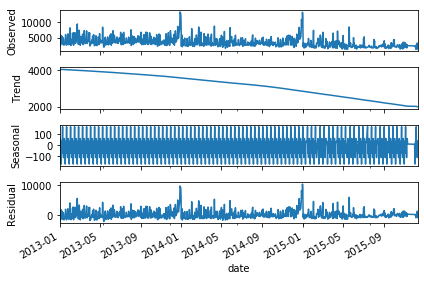

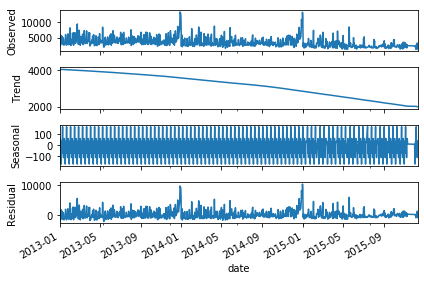

In [130]:
decom.plot()

In [131]:
facst = forecast(decom,steps=36,fc_func=drift,seasonal=True)
facst

,drift+seasonal
2015-12-11,2010.408053
2015-12-12,1887.402997
2015-12-13,2034.279116
2015-12-14,2055.576766
2015-12-15,2003.012149
2015-12-16,1997.587104
2015-12-17,1815.419963
2015-12-18,1989.927250
2015-12-19,2017.471129
2015-12-20,2004.352219


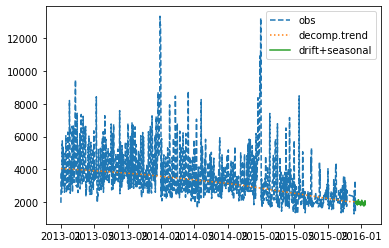

In [132]:
plt.plot(Item_List, '--', label='obs')
plt.plot(decom.trend, ':', label='decomp.trend')
plt.plot(facst, '-', label=facst.columns[0])
plt.legend();

fig.set_figwidth(40)
fig.set_figheight(26)

## ETS Model (Exponential Smoothing Technique

In [133]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [134]:
Item_List.index = pd.DatetimeIndex(Item_List.index).to_period('D')

In [135]:
#We will take random value of Alplha,Beta and Gamma values to check the ETS model since we have both Seasonality,Trend and Irregularity

alpha = 0.4
beta  = 0.2
gamma = 0.01

#initialise Model
ets_model = ExponentialSmoothing(Item_List,trend='mul',seasonal='mul',seasonal_periods= 12)
ets_fit   = ets_model.fit(smoothing_level = alpha,smoothing_slope = beta,smoothing_seasonal = gamma)

In [136]:
#Forecast p Model ahead
p_ahead = 12
yh = ets_fit.forecast(p_ahead)

In [137]:
yh

2015-12-11    2768.586695
2015-12-12    2768.825684
2015-12-13    2774.763556
2015-12-14    2944.711216
2015-12-15    2710.518990
2015-12-16    2762.317645
2015-12-17    2691.938031
2015-12-18    2821.599300
2015-12-19    2977.780972
2015-12-20    2896.813427
2015-12-21    2887.475508
2015-12-22    2756.949303
Freq: D, dtype: float64

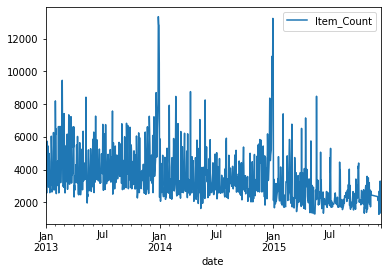

In [138]:
Item_List.plot()
plt.show()

In [139]:
import auto_holtwinters_UDF

In [140]:
auto_holtwinters_UDF.auto_hwm(Item_List, val_split_date = '2013-01-01', alpha = np.linspace(0,0.5,5), beta = np.linspace(0,0.5,5), gamma = np.linspace(0,0.5,5), trend='mul', seasonal='mul', periods=12)

Evaluating Exponential Smoothing model for 125 fits



C:\Users\abhis\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
C:\Users\abhis\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


{'alpha': 0.25,
 'beta': 0.0,
 'gamma': 0.125,
 'phi': None,
 'mae': 0.34117660889911716}

In [141]:

alpha = 0.25
beta  = 0.0
gamma = 0.125

#initialise Model
ets_model = ExponentialSmoothing(Item_List,trend='mul',seasonal='mul',seasonal_periods= 12)
ets_fit   = ets_model.fit(smoothing_level = alpha,smoothing_slope = beta,smoothing_seasonal = gamma)

In [142]:
#Forecast

p_ahead = 24
yh = ets_fit.forecast(p_ahead)

In [143]:
yh

2015-12-11    1495.354594
2015-12-12    1406.649265
2015-12-13    1224.621181
2015-12-14    1615.418417
2015-12-15    1391.074668
2015-12-16    1464.657562
2015-12-17    1450.068770
2015-12-18    1241.267182
2015-12-19    1418.181586
2015-12-20    1230.207116
2015-12-21    1358.304755
2015-12-22    1236.557760
2015-12-23    1341.113972
2015-12-24    1261.558289
2015-12-25    1098.305768
2015-12-26    1448.793630
2015-12-27    1247.590158
2015-12-28    1313.583232
2015-12-29    1300.499223
2015-12-30    1113.234792
2015-12-31    1271.901091
2016-01-01    1103.315534
2016-01-02    1218.200347
2016-01-03    1109.011131
Freq: D, dtype: float64

## Perform Dickey-Fuller Test - To Check Stationarity and ACF,PACF Garph for ARIMA,SARIMA Model Requisites 

- Let's run the Dicky Fuller Test on the timeseries and verify the null hypothesis that the TS is non-stationary.
- To verify and compute Time Series is stationary or not
- To identify Yt Value(Main Forecatsing Value Sales Ts which will give Stationarirty if not then we will take values of Aplha,beta ,gamma and plot adfuller where p>0.05 and will further use that Yt to plot ACF and PACF value Graph


#Peform Dickey Fuller Test --> Pre - Requisite of ARIMA model to identify that value the value of sales value in such a way
#that the value retruns a Stationary (Yt) and we can use the Yt value for Forecasting the entire Series

In [144]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [66]:
Item_List

,Item_Count
date,
2013-01-01,1951.0
2013-01-02,3817.0
2013-01-03,3846.0
2013-01-04,2574.0
2013-01-05,4863.0
...,...
2015-12-06,2690.0
2015-12-07,2263.0
2015-12-08,1696.0


In [146]:
Item_List = Item_List.iloc[:,0].values

In [147]:
adfuller(Item_List)

(-4.005788613401083,
 0.0013805018506043425,
 22,
 1011,
 {'1%': -3.436834649927693,
  '5%': -2.864403033735098,
  '10%': -2.568294409927983},
 17350.082348963537)

In [148]:
adfuller(np.log(Item_List))

(-2.9876442191147925,
 0.036064497033727924,
 22,
 1011,
 {'1%': -3.436834649927693,
  '5%': -2.864403033735098,
  '10%': -2.568294409927983},
 536.828561812626)

In [149]:
ln_log_Items = np.diff(np.log(Item_List))

In [150]:
adfuller(ln_log_Items)

(-11.527239314253558,
 3.909183378052683e-21,
 19,
 1013,
 {'1%': -3.436821814402523,
  '5%': -2.8643973728364043,
  '10%': -2.5682913948189823},
 543.1325010744247)

In [151]:
#This Alpha,Beta and Gamma giving p value less than 0.05

from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(ln_log_Items)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -1.152724e+01
p-value                        3.909183e-21
#lags Used                     1.900000e+01
Number of Observations Used    1.013000e+03
Critical Value (1%)           -3.436822e+00
Critical Value (5%)           -2.864397e+00
Critical Value (10%)          -2.568291e+00
dtype: float64


In [172]:
ln_log_Items_diff = np.diff(ln_log_Items)

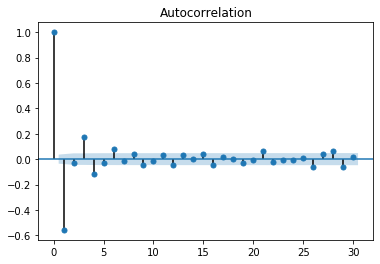

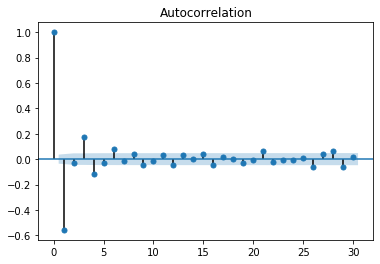

In [161]:
#To find the values of p, q, we need to ACF & PACF. The input time series for ACF & PACF is stationary series

#1. Auto-Correlation

smt.graphics.plot_acf(ln_log_Items_diff, lags=30,  alpha=0.25)

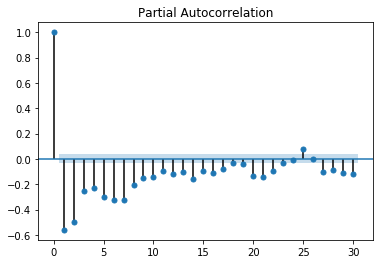

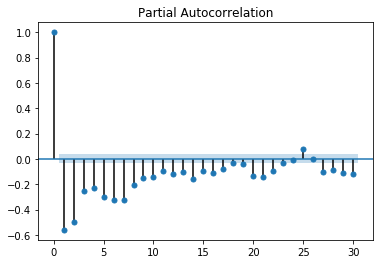

In [160]:

#2. Partial Auto -Correlation

smt.graphics.plot_pacf(ln_log_Items_diff,lags=30,alpha=0.25,method='ols')

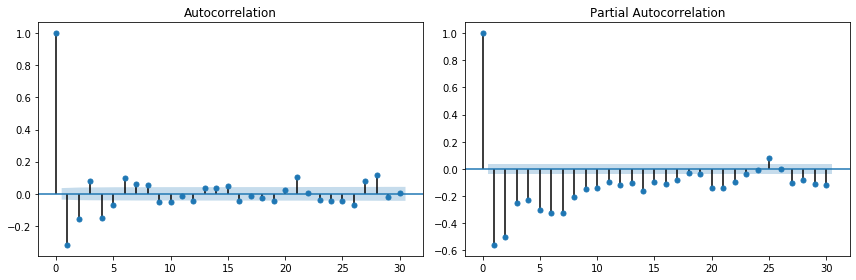

In [163]:
fig, axes = plt.subplots(1, 2, sharey=False, sharex=False)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(ln_log_Items, lags=30, ax=axes[0], alpha=0.25)
smt.graphics.plot_pacf(ln_log_Items_diff, lags=30, ax=axes[1], alpha=0.25, method='ols')
plt.tight_layout()

As per above Data we have identifed that there is enough data present in Residuals and we have to extart the informaion from these data. Here noth AR and MA present along with Seasonal effect hence we need to use SARIMA to conculde the perfect data for plotting thd forecasting

In [164]:
#Create Model - Using Random values of p,d,q

import statsmodels.api as sm

model = sm.tsa.statespace.SARIMAX(ln_log_Items, order = (1,2,1), seasonal_order= (1,0,1,12),
                                             enforce_stationarity=False,
                                             enforce_invertibility=False).fit()

In [165]:
print(model.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                 1033
Model:             SARIMAX(1, 2, 1)x(1, 0, 1, 12)   Log Likelihood                -775.156
Date:                            Fri, 17 Jul 2020   AIC                           1560.312
Time:                                    21:20:54   BIC                           1584.935
Sample:                                         0   HQIC                          1569.663
                                           - 1033                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5625      0.025    -22.830      0.000      -0.611      -0.514
ma.L1         -1.0000     27.977   

In [166]:
#User Defined method to calculate Best Method of p,d,q and P,D,Q

import sys
import itertools
import warnings

def auto_arima(timeseries, regressors=None, p=range(0, 2), d=range(0, 2), q=range(0, 2),
              P=range(0, 2), D=range(0, 1), Q=range(0, 2)):

    # Generate all different combinations of p, d and q triplets
    pdq = list(itertools.product(p, d, q))

    # Generate all different combinations of seasonal p, q and q triplets
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]
    
    warnings.filterwarnings("ignore") # specify to ignore warning messages

    best_aic = np.inf
    best_pdq = None
    best_seasonal_pdq = None
    best_results = None
    
    for param in pdq:
        for param_seasonal in seasonal_pdq:

            try:
                temp_model = sm.tsa.statespace.SARIMAX(endog=timeseries,
                                                 exog=regressors,
                                                 order = param,
                                                 seasonal_order = param_seasonal,
                                                 enforce_stationarity=False,
                                                 enforce_invertibility=False)
                temp_results = temp_model.fit()

                print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, temp_results.aic))
                
                if temp_results.aic < best_aic:
                    best_aic = temp_results.aic
                    best_pdq = param
                    best_seasonal_pdq = param_seasonal
                    best_results = temp_results
                
            except:
                #print("Unexpected error:", sys.exc_info()[0])
                continue
    print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))
    print(best_results.summary().tables[0])
    print(best_results.summary().tables[1])
    #return best_results

In [167]:
best_results = auto_arima(ln_log_Items,  p=range(0, 3), d=range(2, 3), q=range(0, 3),
                         P=range(0, 2), D=range(0, 1), Q=range(0, 2))

SARIMAX(0, 2, 0)x(0, 0, 0, 12)12 - AIC:3127.308060575522
SARIMAX(0, 2, 0)x(0, 0, 1, 12)12 - AIC:3088.313149722333
SARIMAX(0, 2, 0)x(1, 0, 0, 12)12 - AIC:3090.696761069409
SARIMAX(0, 2, 0)x(1, 0, 1, 12)12 - AIC:3089.552214765445
SARIMAX(0, 2, 1)x(0, 0, 0, 12)12 - AIC:1961.783300327295
SARIMAX(0, 2, 1)x(0, 0, 1, 12)12 - AIC:1940.0313180050043
SARIMAX(0, 2, 1)x(1, 0, 0, 12)12 - AIC:1943.610342477043
SARIMAX(0, 2, 1)x(1, 0, 1, 12)12 - AIC:1940.5968082480947
SARIMAX(0, 2, 2)x(0, 0, 0, 12)12 - AIC:979.0585264039662
SARIMAX(0, 2, 2)x(0, 0, 1, 12)12 - AIC:969.8915184039016
SARIMAX(0, 2, 2)x(1, 0, 0, 12)12 - AIC:973.760433675902
SARIMAX(0, 2, 2)x(1, 0, 1, 12)12 - AIC:971.4039866152261
SARIMAX(1, 2, 0)x(0, 0, 0, 12)12 - AIC:2518.071331591079
SARIMAX(1, 2, 0)x(0, 0, 1, 12)12 - AIC:2484.324265330261
SARIMAX(1, 2, 0)x(1, 0, 0, 12)12 - AIC:2483.799311893982
SARIMAX(1, 2, 0)x(1, 0, 1, 12)12 - AIC:2486.3220479939528
SARIMAX(1, 2, 1)x(0, 0, 0, 12)12 - AIC:1575.74775045238
SARIMAX(1, 2, 1)x(0, 0, 1, 12)

In [168]:
#Using Above model forecasting the future values - Sample if it working

fct = np.exp(model.forecast(36))

In [175]:
fct

array([0.96907723, 0.60038234, 0.79134146, 0.67766666, 0.73792906,
       0.70074085, 0.73449191, 0.6950712 , 0.72071582, 0.71896157,
       0.70132053, 0.73268901, 0.71475055, 0.72463367, 0.71890038,
       0.72196956, 0.72009462, 0.72100364, 0.72032097, 0.72059015,
       0.72028297, 0.72028455, 0.72016598, 0.7200472 , 0.71996484,
       0.71986205, 0.71977078, 0.71967304, 0.71957895, 0.71948283,
       0.71938792, 0.71929225, 0.71919709, 0.71910169, 0.71900636,
       0.71891112])

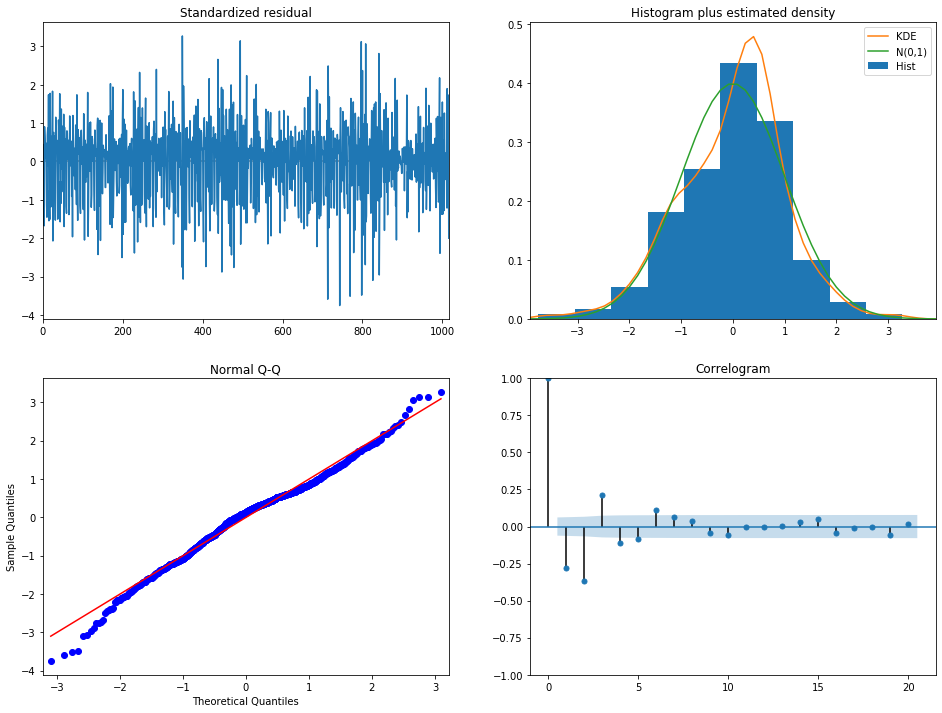

In [176]:
#To Visualise the Model Data 

model.plot_diagnostics(lags=20, figsize=(16,12))
plt.show()